## Observations and Insights 

1) Based on the box plot below, Capomulin and Ramicane were proper treatments to reduce the final tumor size (mm3). Other two drugs, Infubinol and Ceftamin, were not effective as Capomulin and Ramicane based on the final tumor size (mm3). Therefore, it would be better for Pymaceuticals, inc. to study these two treatment regimens, Capomulin and Ramicane.
2) Line plot 'Tumor Vol. vs Timepoint for Mouse ID: s185' shows that Mouse ID: s185 showed decrease in tumor volume by treatments with Capomulin. Therefore, Capomulin is an effective treatment.
3) There is a positive correlation between average tumor size and weights of mice. The correlation coefficient showed the value of 0.84 which means that there is a strong correlation. Therefore, in order to decrease the tumor size, we need to keep weights of mice as low as possible.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on=['Mouse ID','Mouse ID'])

In [3]:
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
unique_id = data_df['Mouse ID'].unique()
mice_count = len(unique_id)
mice_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = data_df[data_df.duplicated(['Mouse ID','Timepoint'])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data_df['Mouse ID'].value_counts()

k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
druggroup_data = clean_data_df.groupby(['Drug Regimen'])

In [10]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
avg_data = druggroup_data['Tumor Volume (mm3)'].mean()

In [11]:
med_data = druggroup_data['Tumor Volume (mm3)'].median()

In [12]:
var_data = druggroup_data['Tumor Volume (mm3)'].var()

In [13]:
std_data = druggroup_data['Tumor Volume (mm3)'].std()

In [14]:
sem_data = druggroup_data['Tumor Volume (mm3)'].sem()

In [15]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'Mean Tumor Vol.':avg_data,
                           'Median Tumor Vol.':med_data,
                           'Variance Tumor Vol.':var_data,
                           'Standard Deviation Tumor Vol.':std_data,
                           'SEM Tumor Vol.':sem_data})

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df

,Mean Tumor Vol.,Median Tumor Vol.,Variance Tumor Vol.,Standard Deviation Tumor Vol.,SEM Tumor Vol.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Using the aggregation method, produce the same summary statistics in a single line

In [17]:
druggroup_data = clean_data_df.groupby(['Drug Regimen'])
druggroup_data.agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_mice = clean_data_df.groupby(['Drug Regimen'])['Timepoint'].count()

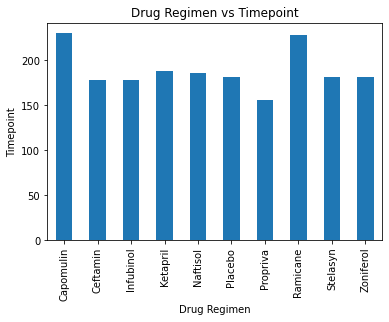

In [19]:
drug_mice.plot(kind='bar',xlabel='Drug Regimen',ylabel='Timepoint',title='Drug Regimen vs Timepoint')
plt.show()

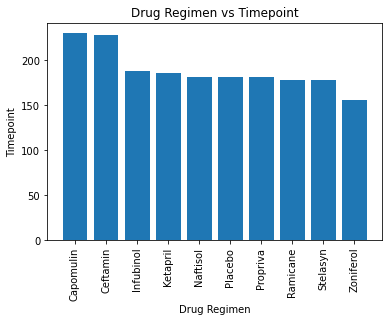

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set y-axis
y_axis = clean_data_df['Drug Regimen'].value_counts()
# Set x-axis
x_axis = drug_mice.index

plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.ylabel('Timepoint')
plt.title('Drug Regimen vs Timepoint')
plt.show()

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_data_df.groupby(['Sex'])['Sex'].count()

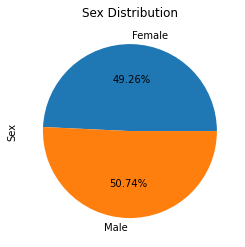

In [22]:
sex.plot(kind='pie', title='Sex Distribution', autopct='%1.2f%%')
plt.show()

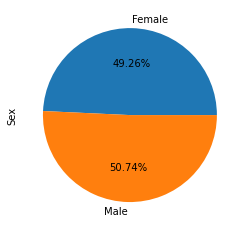

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('Female','Male'), autopct='%1.2f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp_df = pd.DataFrame(clean_data_df.groupby(['Mouse ID'])['Timepoint'].max())

In [25]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_last_tp = pd.merge(clean_data_df, last_tp_df, on=('Mouse ID', 'Timepoint'), how = 'right')
merged_last_tp

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

In [27]:
#Test treatments list
#treatments[0]

In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate therows which contain mice on each drug and get the tumor volume
for x in treatments:
    # add subset
    tumor = merged_last_tp.loc[merged_last_tp['Drug Regimen'] == x,'Tumor Volume (mm3)']
    tumor_vol.append(tumor)
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([0.25, 0.50, 0.75])
    lowb = quartiles[0.25]
    uppb = quartiles[0.75]
    iqr = uppb - lowb
    lowout = lowb-(1.5*iqr)
    uppout = uppb+(1.5*iqr)
    outliers = tumor.loc[(tumor>uppout)|(tumor<lowout)]
    
    print(f'{x}:{outliers}')

Capomulin:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin:Series([], Name: Tumor Volume (mm3), dtype: float64)


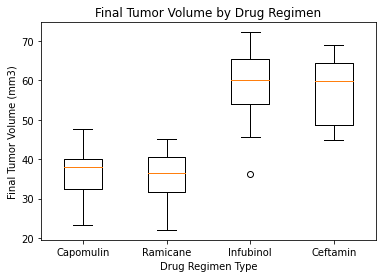

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol)
plt.title('Final Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen Type')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Find a mouse with Capomulin treatment
data_df[data_df['Drug Regimen'] == 'Capomulin']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [41]:
#Mouse ID: s185
cap_mouse = data_df.loc[data_df['Mouse ID'] == 's185']

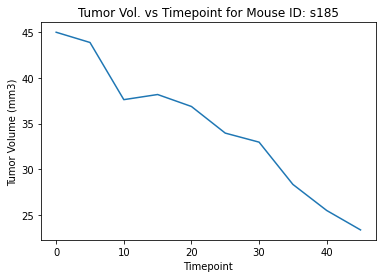

In [44]:
#Line plot
plt.plot(cap_mouse['Timepoint'],cap_mouse['Tumor Volume (mm3)'])
plt.title('Tumor Vol. vs Timepoint for Mouse ID: s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_reg = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
cap_reg

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [55]:
#Average tumor volume
avg_reg = cap_reg.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_reg_df = pd.DataFrame(avg_reg)

In [58]:
merged_avg_reg = pd.merge(cap_reg, avg_reg, on = 'Mouse ID')
merged_avg_reg = merged_avg_reg[['Weight (g)', 'Tumor Volume (mm3)_y']].drop_duplicates()

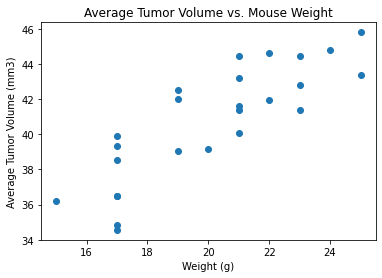

In [62]:
plt.scatter(merged_avg_reg['Weight (g)'], merged_avg_reg['Tumor Volume (mm3)_y'])
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [98]:
#Correlation Coefficient
cor = st.pearsonr(merged_avg_reg['Weight (g)'], merged_avg_reg['Tumor Volume (mm3)_y'])
cor[0]

0.8419363424694721

In [79]:
#Linear Regression
(slope, intercept, rval, pval, stderr) = st.linregress(merged_avg_reg['Weight (g)'], merged_avg_reg['Tumor Volume (mm3)_y'])

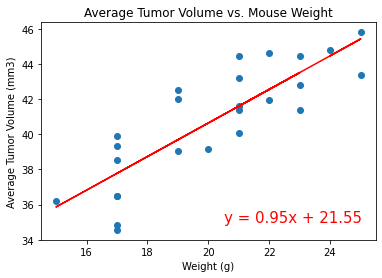

In [97]:
regress_values = (merged_avg_reg['Weight (g)'] * slope) + intercept
#Liner regression equation (for the graph)
line_eq = "y = "+ str(round(slope, 2)) + "x + "+ str(round(intercept, 2))
#Scatterplot
plt.scatter(merged_avg_reg['Weight (g)'], merged_avg_reg['Tumor Volume (mm3)_y'])
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#Lin Regress line
plt.plot(merged_avg_reg['Weight (g)'], regress_values, "r-")
#Line on graph
plt.annotate(line_eq,(20.5, 35),fontsize=15,color="red")
plt.show()